In [2]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import zipfile, os
import numpy as np
import shutil
import random

In [3]:
tf.__version__

'2.15.0'

In [4]:
base_dir = 'Dataset/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

In [6]:
for class_dir in ['paper', 'scissors', 'rock']:
    class_path = os.path.join(base_dir, class_dir)
    images = os.listdir(class_path)
    random.shuffle(images)

    num_train = int(np.ceil(len(images) * 0.6))
    num_val = len(images) - num_train

    train_class_dir = os.path.join(train_dir, class_dir)
    os.makedirs(train_class_dir)
    val_class_dir = os.path.join(validation_dir, class_dir)
    os.makedirs(val_class_dir)

    for i in range(num_train):
        shutil.move(os.path.join(class_path, images[i]), train_class_dir)
    for i in range(num_train, len(images)):
        shutil.move(os.path.join(class_path, images[i]), val_class_dir)

In [9]:
def find_size(dataset):
  sum_ = 0
  for i in ['paper', 'rock', 'scissors']:
    sum_ += len(os.listdir(f'Dataset/rockpaperscissors/{dataset}/{i}'))
  return sum_

In [10]:
print(find_size('train'))
print(find_size('val'))

1314
874


In [11]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(224,224),
                    batch_size=32,
                    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(224, 224),
                    batch_size=32,
                    class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


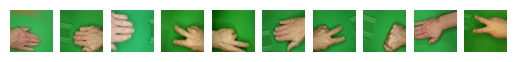

In [13]:
NUMBER_OF_DATA = 10
images, labels = next(train_generator)
print(labels[:NUMBER_OF_DATA])
for i in range(NUMBER_OF_DATA):
    plt.subplot(1, NUMBER_OF_DATA, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,828,675 (182.45 MB)

 Trainable params: 47,828,675 (182.45 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='model_final.keras', monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False, verbose=1)

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [43]:
model.fit(
      train_generator,
      batch_size=64,
      epochs=10,
      validation_data=validation_generator,
      callbacks=[checkpoint, early_stopping]
      )

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3331 - loss: 4.2392
Epoch 1: val_accuracy improved from -inf to 0.55263, saving model to model_final.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.3338 - loss: 4.1917 - val_accuracy: 0.5526 - val_loss: 1.0069
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4512 - loss: 1.0660
Epoch 2: val_accuracy did not improve from 0.55263
42/42 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.4503 - loss: 1.0664 - val_accuracy: 0.5275 - val_loss: 1.0774
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4551 - loss: 1.0549
Epoch 3: val_accuracy improved from 0.55263 to 0.65904, saving model to model_final.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.4558 - loss: 1.0541 - val_accuracy: 0.6590 - val_loss: 0.8774
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5360 - loss: 0.9609
Epoch 4: val_accuracy improved from 0.65904 to 0.82265, saving model to model_final.keras
42

In [44]:
model_saved = tf.keras.models.load_model('model_final.keras')

Saving WhatsApp_Image_2024-10-08_at_17.22.58_5767d465-removebg-preview.png to WhatsApp_Image_2024-10-08_at_17.22.58_5767d465-removebg-preview.png


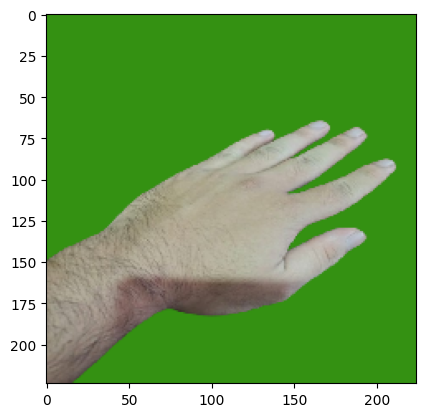

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction output: [[5.1615918e-01 2.3896187e-04 4.8360178e-01]]
paper


In [52]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224, 224))

    plt.imshow(img)
    plt.show()


    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    classes = model_saved.predict(x, batch_size=10)
    print("Prediction output:", classes)

    predicted_class = np.argmax(classes[0])

    if predicted_class == 0:
        print('paper')
    elif predicted_class == 1:
        print('rock')
    elif predicted_class == 2:
        print('scissors')
    else:
        print('Unknown')